In [157]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('C:\Complete ML Bootcamp Udemy\Data\Algerian_forest_fires_dataset.csv',header=0)

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [43]:
df.shape

(247, 14)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB



## Data Cleaning

In [45]:
# Checking missing values

df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [46]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool

In [47]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### In this dataseet we have two regions 
#### So we are going to divide the regions by introducing a new column Region
#### Region column will have 2 values 0 and 1 describing the two regions

In [48]:
df.loc[:122,'Region'] = 0
df.loc[122:, 'Region'] =1

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [50]:
df[['Region']] = df[['Region']].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [53]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [54]:
df = df.dropna().reset_index(drop=True)

In [55]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [56]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
df.drop(122,axis=0,inplace=True)

In [68]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [58]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [73]:
### Observation
#### Some of the columns have spaces so we need to strip out the spaces

df.columns = df.columns.str.strip()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.4+ KB


In [76]:
## Changing datatype of columns

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 23.7+ KB


In [78]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# Segregating features that are in datatype as object

[features for features in df.columns if df[features].dtypes =='O'] 

['Classes']

In [ ]:
objects = [features for features in df.columns if df[features].dtypes =='O']

In [89]:
for i in objects:
    if i != 'Classes':
        df[i] =df[i].astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 23.7+ KB


In [93]:
#Saving the cleaned dataset

df.to_csv('C:\Complete ML Bootcamp Udemy\Saved_Data\Algerian_Forest_Fires_Cleaned.csv')

### Exploratory Data Analysis

In [94]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [95]:
# we dont want day , month, and year columns so we are droping

df_copy = df.drop(['day','month','year'],axis=1)

In [97]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [102]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [ ]:
# we have one categorical feature Classes so we are chaning that to numerical feature

## df_copy['Classes'] = np.where(df['Classes'] == 'not fire',0,1)

# we have extra string in categorical values so it is not working
# where Classes column have value as not fire replace with 0 else 1
df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [104]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [105]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [106]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 19.9 KB



## Visualization

C:\Users\abman\AppData\Local\Temp\ipykernel_13628\471334800.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


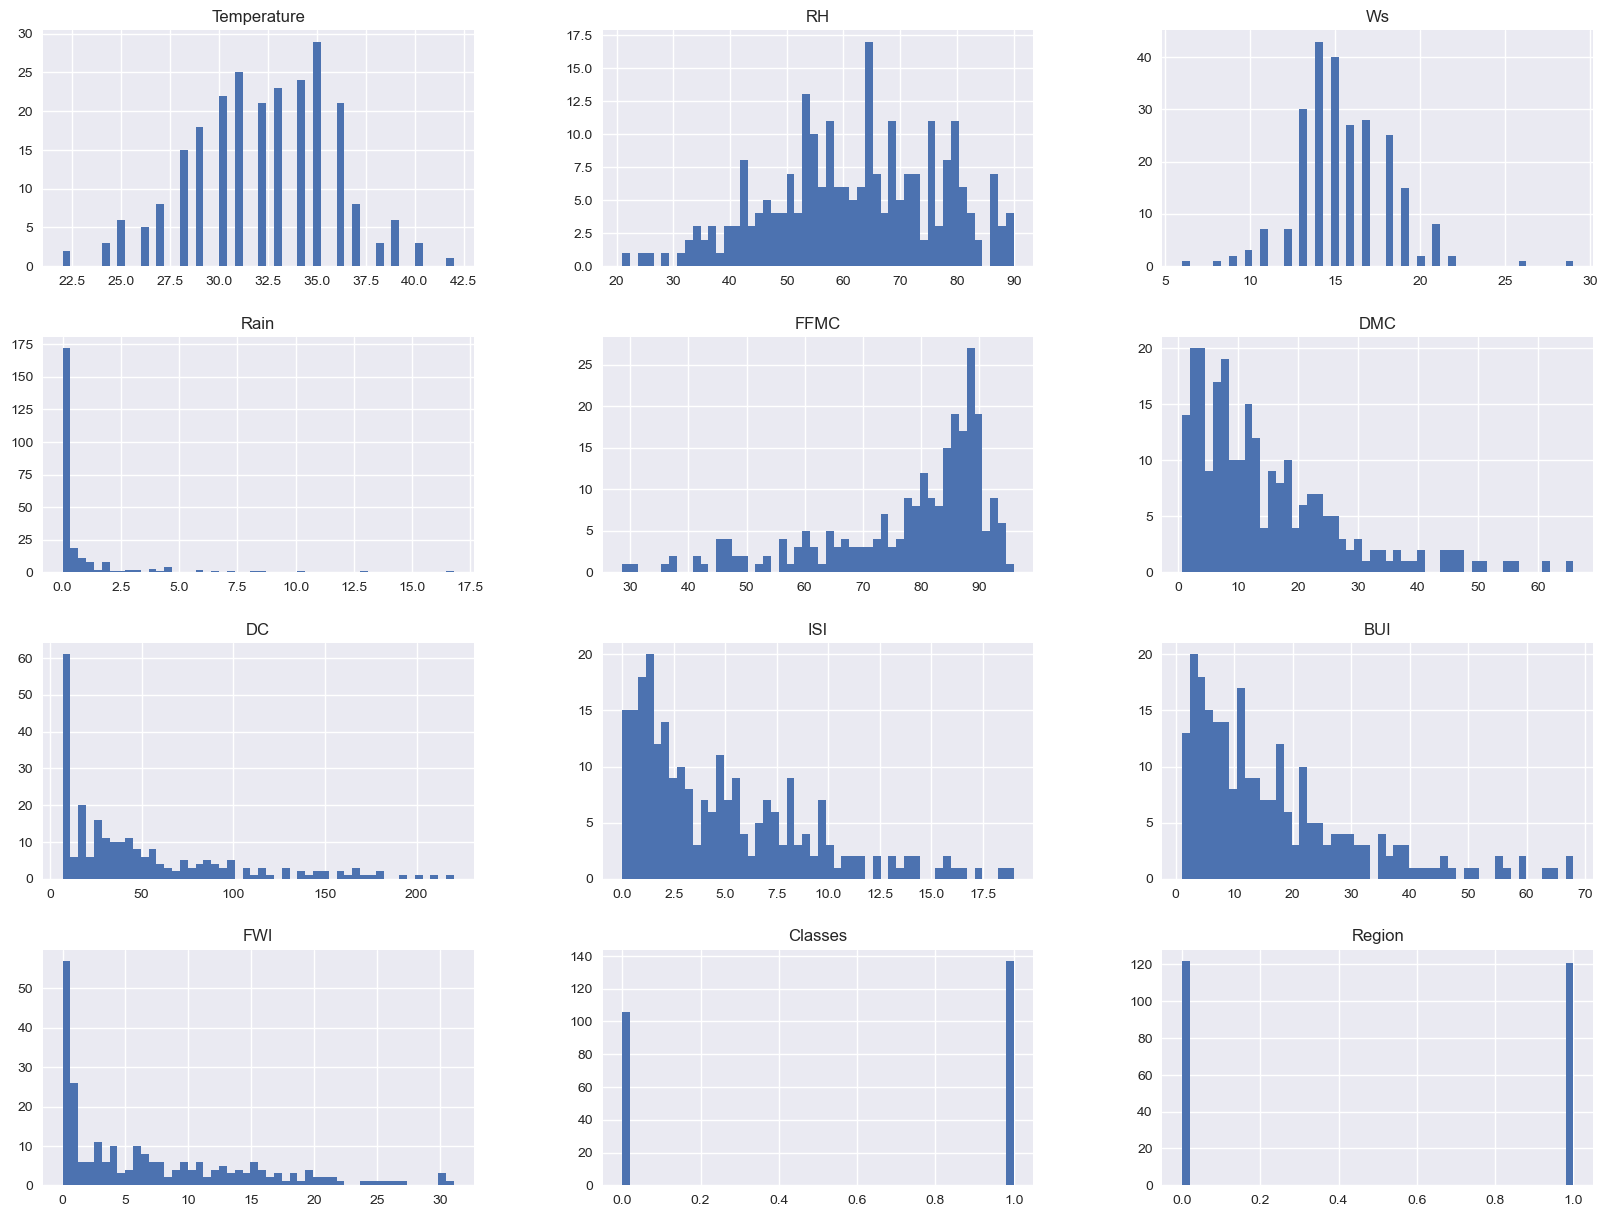

In [109]:
# Density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Percentage for piechart

df_copy['Classes'].value_counts(normalize=True)*100

1    56.378601
0    43.621399
Name: Classes, dtype: float64

In [112]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

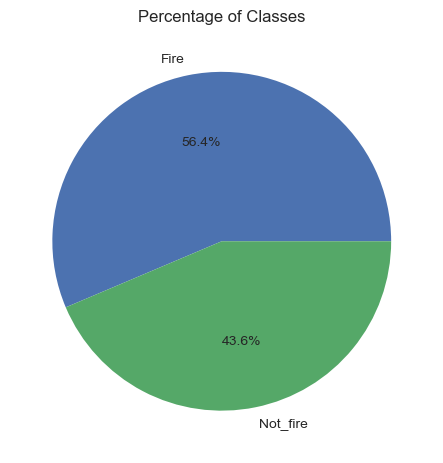

In [115]:
# Pie chart

Class_labels = ['Fire','Not_fire']

plt.pie(percentage,labels=Class_labels,autopct='%1.1f%%')
plt.title('Percentage of Classes')
plt.show()


In [133]:
# Correlation

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


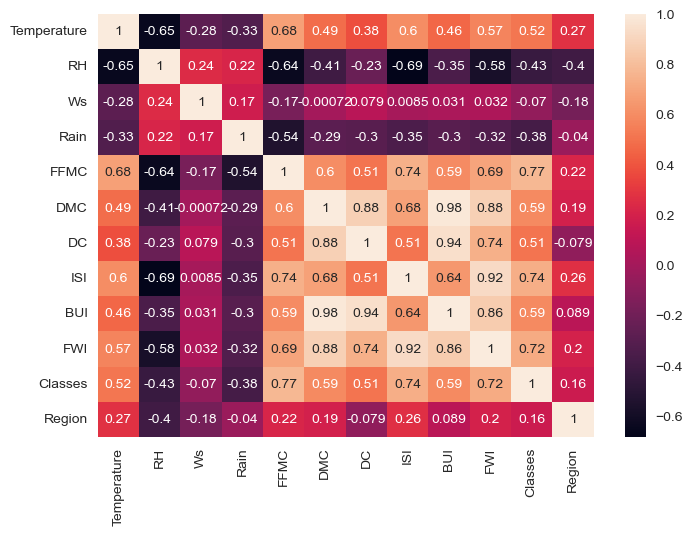

In [134]:

sns.heatmap(df_copy.corr(),annot=True)
plt.show()

<Axes: >

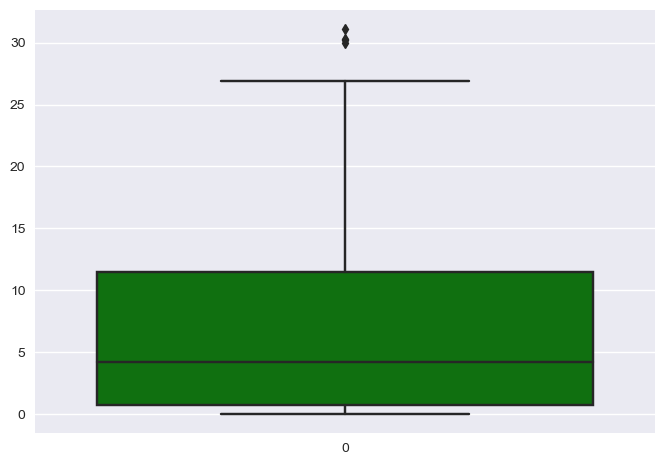

In [135]:
# Box plots

sns.boxplot(df_copy['FWI'],color='g')


In [136]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Text(0.5, 1.0, 'Fire Analysis for Sidbel Region')

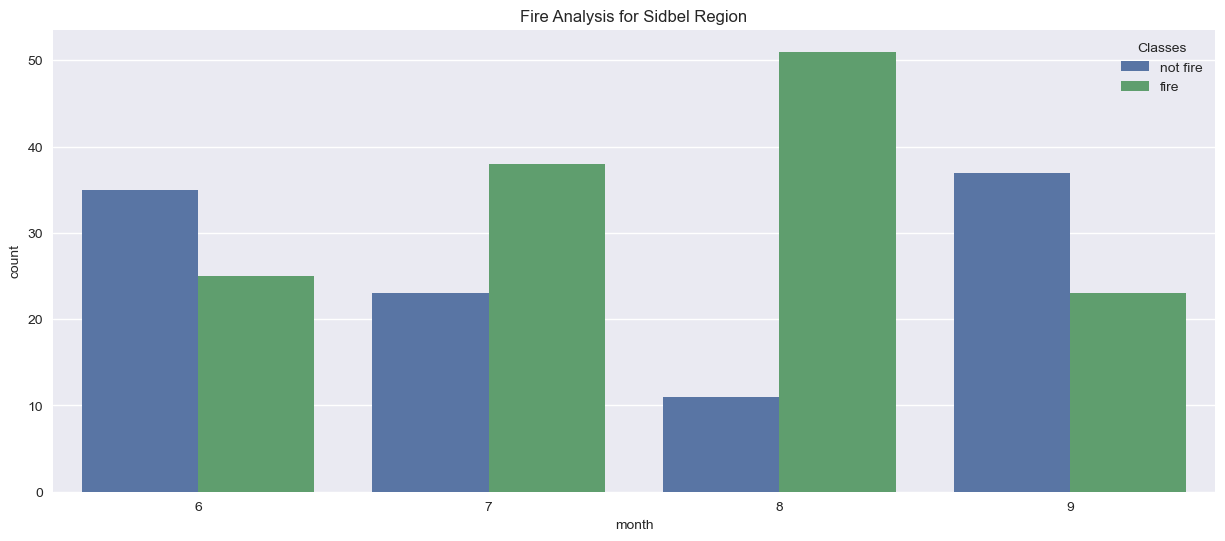

In [155]:
## df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (15,6))
sns.countplot(x='month',hue='Classes',data=df)
plt.title('Fire Analysis for Sidbel Region')

Text(0.5, 1.0, 'Fire Analysis for Brajaria Region')

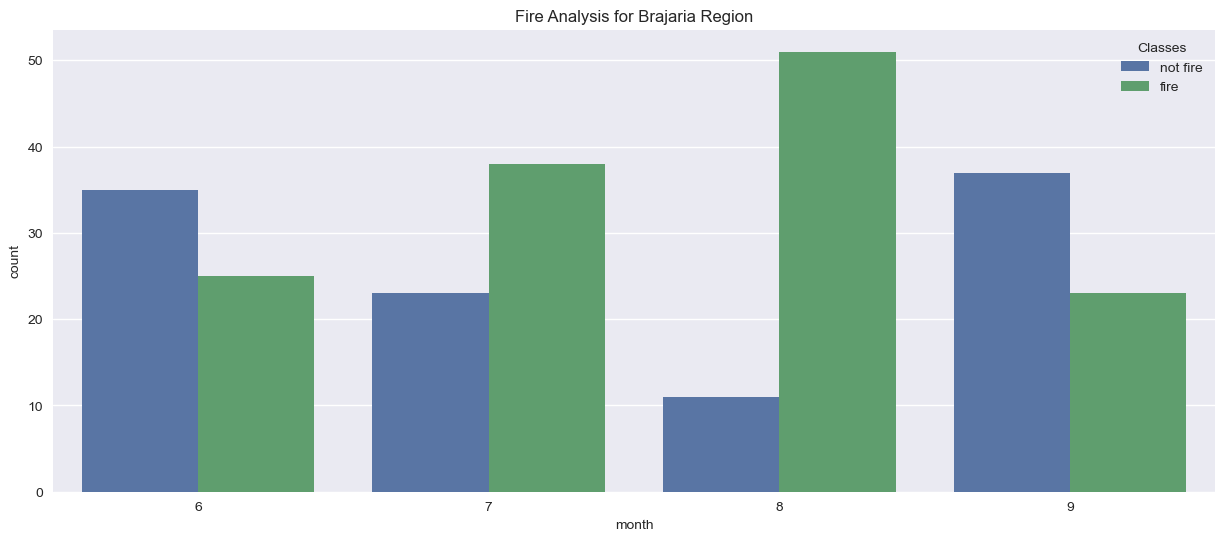

In [156]:
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (15,6))
sns.countplot(x='month',hue='Classes',data=df)
plt.title('Fire Analysis for Brajaria Region')

In [154]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Model Training

In [158]:
df = pd.read_csv('C:\Complete ML Bootcamp Udemy\Saved_Data\Algerian_Forest_Fires_Cleaned.csv')

In [159]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [160]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [161]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [162]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [163]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [164]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0, 1)

In [165]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [166]:
df['Classes'].unique()

array([0, 1])

In [170]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [171]:
X = df.drop(['FWI'],axis=1)

In [172]:
X

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [173]:
y = df['FWI']

In [174]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [175]:
# Train test Split

from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40) 

In [176]:
X_train.shape, X_test.shape

((182, 12), (61, 12))

In [179]:
corr = X_train.corr()

<Axes: >

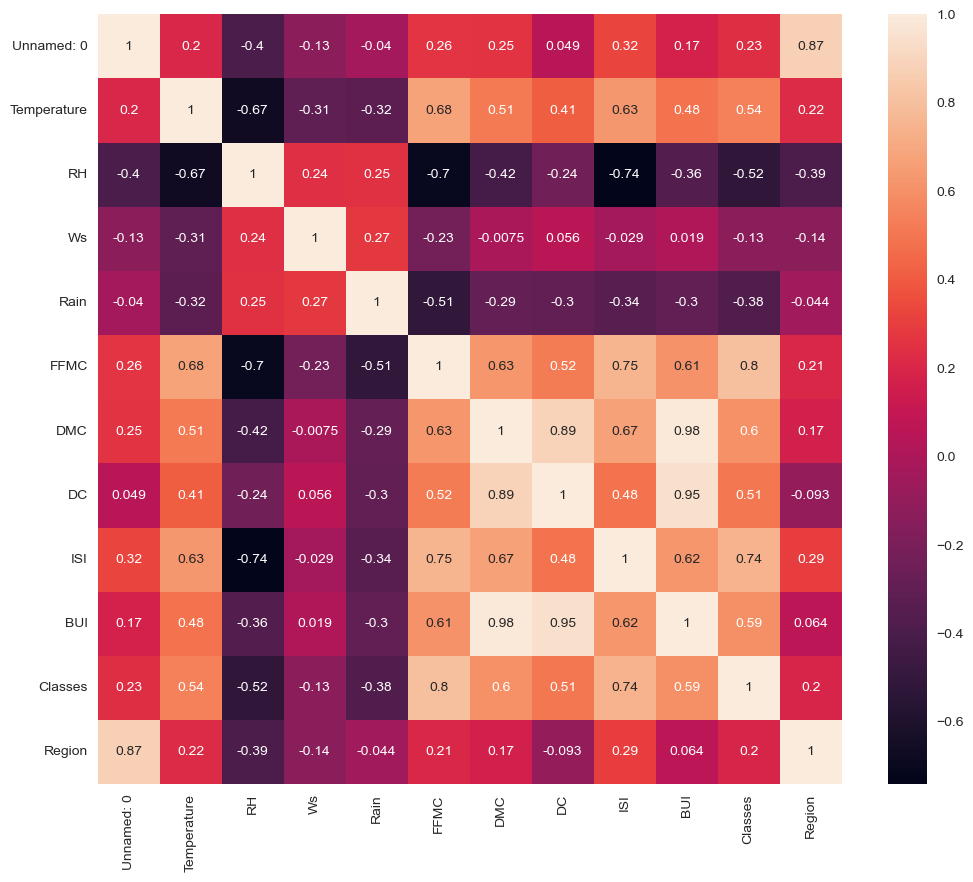

In [180]:
plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True)

In [181]:
corr.columns

Index(['Unnamed: 0', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'Classes', 'Region'],
      dtype='object')

In [192]:
def correlation(dataset,treshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > treshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [196]:
correlation(X_train, 0.88)

{'BUI', 'DC'}

In [197]:
correlation_features = correlation(X_train, 0.88)

In [199]:
X_train.drop(correlation_features,axis=1,inplace=True)
X_test.drop(correlation_features,axis=1,inplace=True)

In [200]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [201]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int32  
 12  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(5)
memory usage: 23.9 KB


In [228]:
# Standardizing the model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled =scaler.transform(X_test)

C:\Users\abman\AppData\Local\Temp\ipykernel_13628\3843472667.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After scaling')

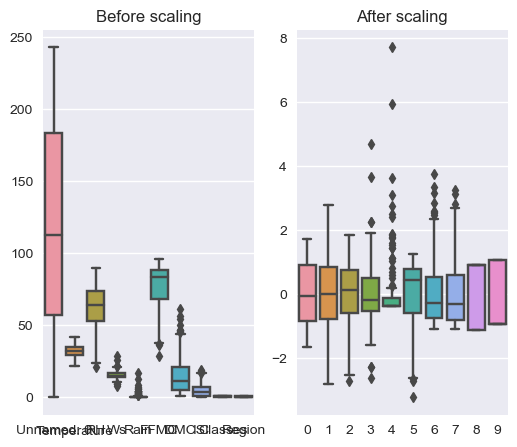

In [229]:
plt.subplots(figsize=(6,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_Scaled)
plt.title('After scaling')

In [223]:
X_train_Scaled.shape

(61, 10)

In [224]:
y_train.shape

(182,)

# Model

In [230]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

model.fit(X_train_Scaled,y_train)

LinearRegression()

In [235]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [236]:
print('mse:',mse)
print('r2_score',r2)

mse: 0.5399561664335545
r2_score 0.9883190106317338


In [ ]:
from sklearn.linear_model import Lasso
model =Lasso()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 2.3301628563012486
r2_score 0.9495910793452655


In [238]:
from sklearn.linear_model import Ridge
model =Ridge()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 0.5544015951075645
r2_score 0.9880065095265502


In [239]:
from sklearn.linear_model import ElasticNet
model =ElasticNet()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 5.885482243572483
r2_score 0.8726780805775842


## Cross Validation

In [241]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)

LassoCV(cv=5)

In [244]:
lassocv.predict(X_test_Scaled)

array([ 1.22844273e+01,  9.64437523e+00,  3.13849842e-01,  4.21615519e+00,
        4.68388611e-03,  7.84665717e-01,  3.42281701e+00,  7.20546275e+00,
        1.23778499e+01,  6.82150298e+00,  1.13677187e+01,  1.60020280e+00,
        4.46315617e+00,  2.69723532e+01,  8.10372561e+00,  9.85057581e-01,
        1.69713220e+01,  1.07182642e+01,  1.19616430e+01,  6.37156867e+00,
        7.66150285e+00, -4.06099950e-01,  5.14829904e+00,  6.79400119e+00,
        2.58037445e+00,  9.24763320e-01,  1.31959226e+01,  8.53084331e+00,
        1.45821876e+00,  6.87989647e+00, -3.25650212e-01,  9.92039291e+00,
        3.61160494e+00,  5.98036246e-01,  7.14337568e+00,  7.19796595e-01,
        9.88313256e-01,  3.08406940e+00,  1.70119355e+00,  1.12382177e+01,
        1.89422192e+00,  2.52027930e+01,  5.55182211e+00,  2.65111843e+00,
        6.76351341e+00,  3.48381674e+00,  7.27448853e+00,  1.01760457e+00,
        1.41268540e+01,  1.64300471e+01,  2.43112846e+01,  3.90623743e-02,
        1.93930739e+00,  

In [245]:
lassocv.alphas_

array([6.99828963, 6.52662833, 6.08675543, 5.67652848, 5.29394946,
       4.93715499, 4.60440726, 4.29408562, 4.00467862, 3.73477669,
       3.48306524, 3.2483183 , 3.02939252, 2.8252216 , 2.63481112,
       2.45723367, 2.29162434, 2.13717653, 1.99313799, 1.85880716,
       1.73352978, 1.61669567, 1.50773579, 1.40611945, 1.3113517 ,
       1.22297099, 1.14054684, 1.0636778 , 0.99198947, 0.9251327 ,
       0.86278186, 0.80463325, 0.75040366, 0.69982896, 0.65266283,
       0.60867554, 0.56765285, 0.52939495, 0.4937155 , 0.46044073,
       0.42940856, 0.40046786, 0.37347767, 0.34830652, 0.32483183,
       0.30293925, 0.28252216, 0.26348111, 0.24572337, 0.22916243,
       0.21371765, 0.1993138 , 0.18588072, 0.17335298, 0.16166957,
       0.15077358, 0.14061194, 0.13113517, 0.1222971 , 0.11405468,
       0.10636778, 0.09919895, 0.09251327, 0.08627819, 0.08046332,
       0.07504037, 0.0699829 , 0.06526628, 0.06086755, 0.05676528,
       0.05293949, 0.04937155, 0.04604407, 0.04294086, 0.04004

In [246]:
lassocv.intercept_

7.15934065934066

In [247]:
lassocv.mse_path_

array([[61.91833825, 55.96400141, 53.70485625, 53.10898562, 64.19133609],
       [56.45475324, 50.15803294, 48.58378259, 47.30971064, 62.86111458],
       [50.44065655, 45.06628418, 44.08365225, 42.07749348, 54.53799421],
       [44.7956254 , 40.3075216 , 40.12669248, 36.94120956, 47.14880832],
       [39.31791704, 35.40818988, 36.64505121, 32.46770129, 40.79667538],
       [34.54519925, 31.13725275, 32.60023639, 28.57087357, 35.34146016],
       [30.38612077, 27.41411755, 28.67180781, 25.17629492, 30.66169323],
       [26.76106802, 24.16776288, 25.24591588, 22.21876938, 26.65197989],
       [23.60144575, 21.33663758, 22.25743587, 19.64171365, 23.22090494],
       [20.84686841, 18.86717061, 19.64998836, 17.39573787, 20.28941166],
       [18.44501638, 16.71273402, 17.37449749, 15.43833041, 17.78882989],
       [16.35035533, 14.83247006, 15.38778368, 13.73202334, 15.659725  ],
       [14.52305968, 13.19162531, 13.65362847, 12.24437023, 13.85049311],
       [12.92905781, 11.75913263, 12.1

mse: 0.5381326085645423
r2_score 0.9883584600563436


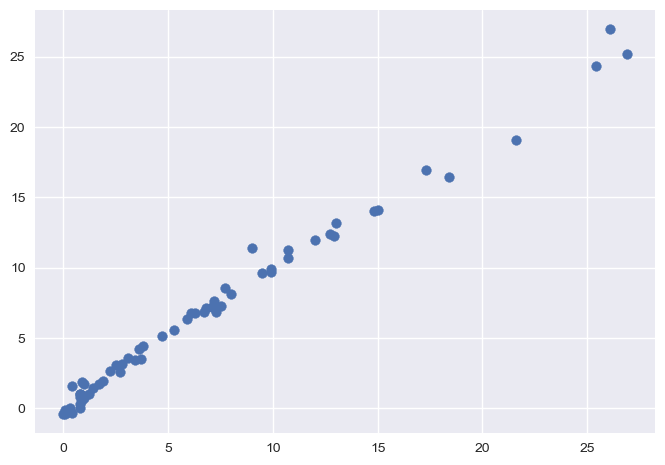

In [250]:
y_pred = lassocv.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)

mse: 0.5544015951075645
r2_score 0.9880065095265502


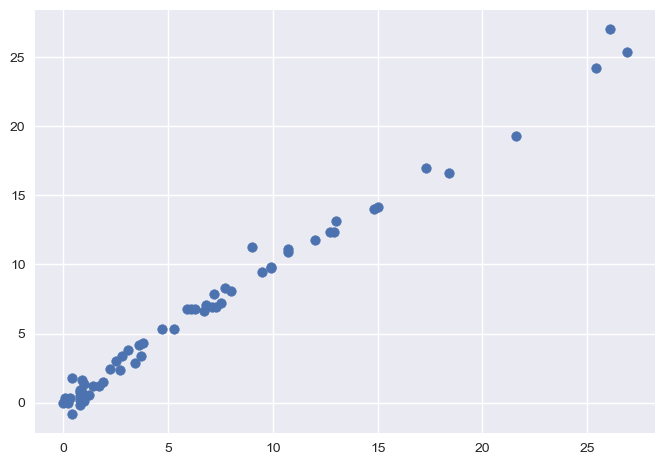

In [252]:
from sklearn.linear_model import RidgeCV
RidgeCV = RidgeCV(cv=5)
RidgeCV.fit(X_train_Scaled,y_train)

y_pred = RidgeCV.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)

mse: 0.6130587904669426
r2_score 0.9867375656419183


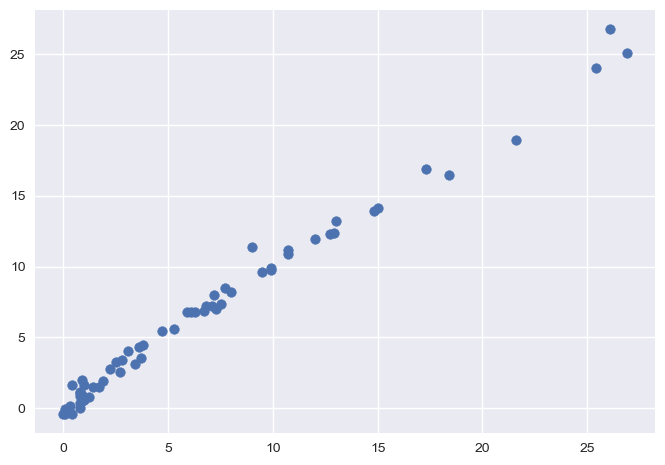

In [253]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_Scaled,y_train)

y_pred = ElasticNetCV.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)